<a href="https://colab.research.google.com/github/laraAkg/ML2/blob/main/1_EMNIST_first_steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EMNIST Letters First Steps

This notebook adapts the familiar MNIST example to work with EMNIST/letters dataset. The overall structure and approach remains the same, but now we're classifying letters (A-Z) instead of digits (0-9).

Import TensorFlow and dependencies

In [61]:
# TensorFlow and tf.keras
import tensorflow as tf
import tensorflow_datasets as tfds

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.config.list_physical_devices())

2.18.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Load and prepare the EMNIST Letters dataset


In [62]:
# Load EMNIST Letters dataset
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',  # Using letters variant
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Convert to numpy arrays
def prepare_dataset(dataset):
    images = []
    labels = []
    for image, label in dataset:
        # Labels in EMNIST are 1-indexed (1-26), subtract 1 to make 0-indexed
        images.append(image.numpy())
        labels.append(label.numpy() - 1)  # Convert to 0-25 range

    return np.array(images), np.array(labels)

# Get training and test data
train_images, train_labels = prepare_dataset(ds_train)
test_images, test_labels = prepare_dataset(ds_test)

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Create a letter map for easier visualization (A-Z)
letters = [chr(ord('A') + i) for i in range(26)]

print('Training set shape:', train_images.shape)
print('Test set shape:', test_images.shape)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.ZA4JSC_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.ZA4JSC_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/letters/3.1.0. Subsequent calls will reuse this data.
Training set shape: (88800, 28, 28, 1)
Test set shape: (14800, 28, 28, 1)


## Explore the data

In [63]:
# Display information about the dataset
print(f"Number of training examples: {len(train_images)}")
print(f"Number of test examples: {len(test_images)}")
print(f"Image shape: {train_images[0].shape}")
print(f"Number of classes: {len(np.unique(train_labels))}")

Number of training examples: 88800
Number of test examples: 14800
Image shape: (28, 28, 1)
Number of classes: 26


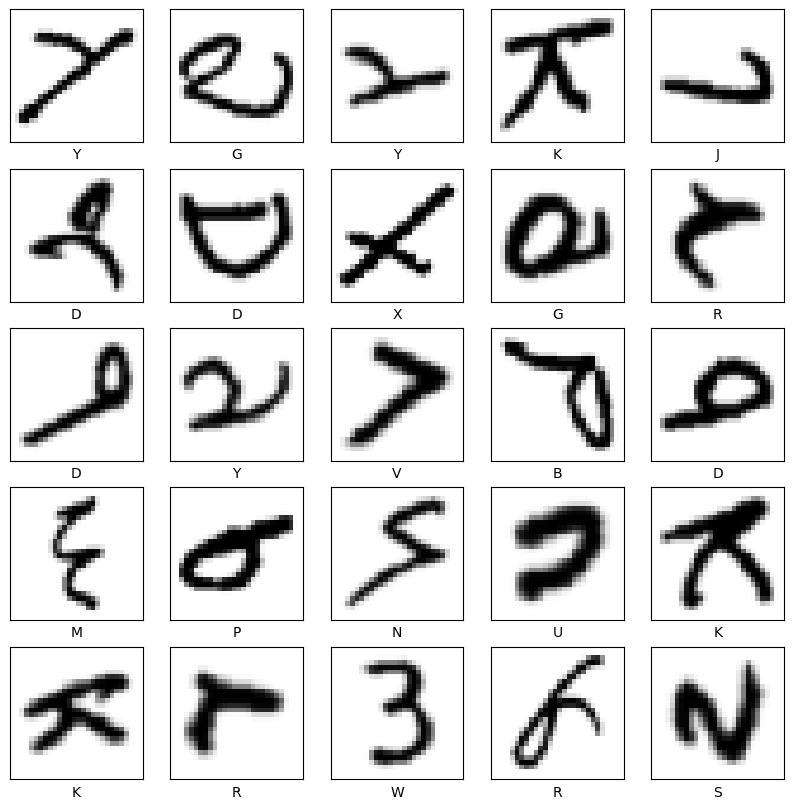

In [64]:
# Display first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(letters[train_labels[i]])
plt.show()

## Create and train the model

Implement an ANN with 2 Hidden Layers, the first with 128 neurons and "relu" activation functions. The second layer contains 64 neurons (also relu activation function). The output layer has 26 neurons (for 26 letters) with softmax activation.

In [65]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),  # EMNIST images are 28x28 with 1 channel
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(26, activation="softmax")  # 26 classes for letters A-Z
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [66]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_split=0.1)

Epoch 1/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.6544 - loss: 1.1876 - val_accuracy: 0.8253 - val_loss: 0.5545
Epoch 2/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8544 - loss: 0.4651 - val_accuracy: 0.8560 - val_loss: 0.4440
Epoch 3/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8825 - loss: 0.3646 - val_accuracy: 0.8636 - val_loss: 0.4283
Epoch 4/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8960 - loss: 0.3196 - val_accuracy: 0.8747 - val_loss: 0.3877
Epoch 5/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9064 - loss: 0.2829 - val_accuracy: 0.8777 - val_loss: 0.4020
Epoch 6/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9124 - loss: 0.2616 - val_accuracy: 0.8855 - val_loss: 0.3717
Epoch 7/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9193 - loss: 0.2372 - val_accuracy: 0.8811 - val_loss: 0.3819
Epoch 8/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9233 - loss: 0

In [67]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

463/463 - 1s - 2ms/step - accuracy: 0.8766 - loss: 0.4237

Test accuracy: 0.8766216039657593


In [68]:
# Select a few test images
X_new = test_images[:3]

# Make predictions
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=1)

print("Predicted classes:", y_pred)
print("Predicted letters:", [letters[pred] for pred in y_pred])
print("Actual classes:", test_labels[:3])
print("Actual letters:", [letters[label] for label in test_labels[:3]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted classes: [12  7  0]
Predicted letters: ['M', 'H', 'A']
Actual classes: [12  7  0]
Actual letters: ['M', 'H', 'A']


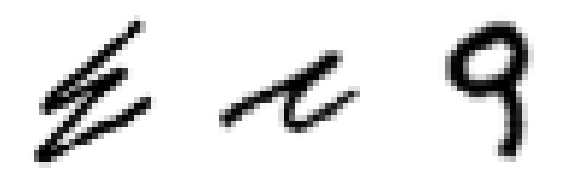

In [69]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

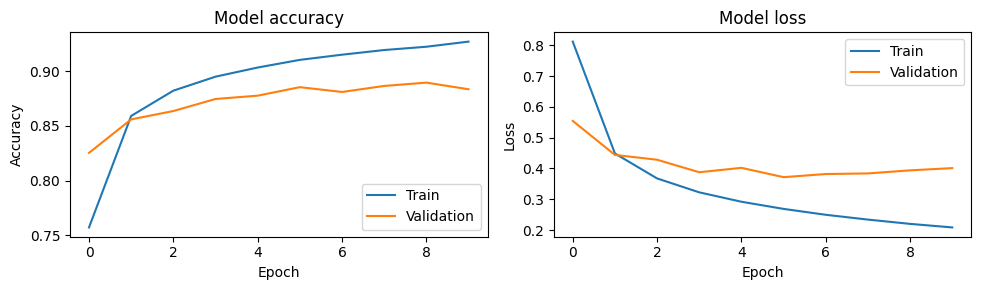

In [70]:
plt.figure(figsize=(10,3))
# Plot training & validation accuracy values
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()